Notebook for coursera capstone project

Zhonghao Sun

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geocoder --yes 
import geocoder

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sunzh\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2019.11.28         |           py37_0         148 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ----------------------------------

# 1 Neighborhood population data

In [7]:
web1=pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")

In [11]:
df_pop=web1[1]
df_pop.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [14]:
df_pop=df_pop[['Name','Population']]
df_pop.head()

,Name,Population
0,Toronto CMA Average,5113149
1,Agincourt,44577
2,Alderwood,11656
3,Alexandra Park,4355
4,Allenby,2513


In [16]:
df_pop.drop([0],inplace=True)

# 2 Neighborhood geographical informaiton

In [18]:
web2=pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

In [20]:
df=web2[0]
df.drop(df[df['Borough']=="Not assigned"].index,inplace=True)
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [21]:
Geo=pd.read_csv("http://cocl.us/Geospatial_data")
df_geo=pd.merge(df,Geo, on='Postal Code')
df_geo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [159]:
df=df_pop
df.rename(columns={'Name':'Neighborhood'},inplace=True)
df['Latitude']=0
df['Longitude']=0
df.head()

,Neighborhood,Population,Latitude,Longitude
1,Agincourt,44577,0,0
2,Alderwood,11656,0,0
3,Alexandra Park,4355,0,0
4,Allenby,2513,0,0
5,Amesbury,17318,0,0


In [160]:
for name in df['Neighborhood'].tolist():
    if len(df_geo[df_geo['Neighborhood'].str.match(name)].index)==1:
        df.loc[df['Neighborhood']==name,['Latitude','Longitude']]=df_geo.loc[df_geo[df_geo['Neighborhood'].str.match(name)].index,['Latitude','Longitude']].values.tolist()
    

In [161]:
# remove neighbornood that does not find latidue and longitude
df=df[df['Latitude']!=0]
df.reset_index(drop=True,inplace=True)

In [162]:
df.head()

,Neighborhood,Population,Latitude,Longitude
0,Agincourt,44577,43.794200,-79.262029
1,Alderwood,11656,43.602414,-79.543484
2,Bathurst Manor,14945,43.754328,-79.442259
3,Bayview Village,12280,43.786947,-79.385975
4,Bedford Park,13749,43.733283,-79.419750


# 3 Venue data

In [163]:
CLIENT_ID = '0QPRFOXDWHYK3KI04RKV1INZP5WIZZVAA5EKTEP5MTXBFAWO' # your Foursquare ID
CLIENT_SECRET = 'M055S1XISJTAXWYIZEZ3SXPQNWKASYEBPSWRTFIHUBB1O40Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0QPRFOXDWHYK3KI04RKV1INZP5WIZZVAA5EKTEP5MTXBFAWO
CLIENT_SECRET:M055S1XISJTAXWYIZEZ3SXPQNWKASYEBPSWRTFIHUBB1O40Y


In [164]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [165]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
df_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )


Agincourt
Alderwood
Bathurst Manor
Bayview Village
Bedford Park
Birch Cliff
Brockton
Church and Wellesley
Cliffside
Dorset Park
Eringate
Forest Hill
Garden District
Guildwood
Hillcrest
Humber Summit
Humberlea
Kensington Market
Kingsview Village
Lawrence Manor
Lawrence Park
Leaside
Little Portugal
Malvern
Milliken
Mimico
Moore Park
New Toronto
Parkdale
Parkwoods
Rosedale
Rouge
Rouge Hill
Scarborough Village
Steeles
Summerhill
The Annex
The Beaches
The Danforth
The Kingsway
Thorncliffe Park
Victoria Village
West Deane Park
Westmount
Weston
Wexford
Woburn


In [166]:
print(df_venues.shape)
df_venues.head()

(657, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.794200,-79.262029,Panagio's Breakfast & Lunch,43.792370,-79.260203,Breakfast Spot
1,Agincourt,43.794200,-79.262029,El Pulgarcito,43.792648,-79.259208,Latin American Restaurant
2,Agincourt,43.794200,-79.262029,Twilight,43.791999,-79.258584,Lounge
3,Agincourt,43.794200,-79.262029,Commander Arena,43.794867,-79.267989,Skating Rink
4,Alderwood,43.602414,-79.543484,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place


In [167]:
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
Alderwood,10,10,10,10,10,10
Bathurst Manor,19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
Bedford Park,23,23,23,23,23,23
Birch Cliff,4,4,4,4,4,4
Brockton,23,23,23,23,23,23
Church and Wellesley,76,76,76,76,76,76
Cliffside,2,2,2,2,2,2


In [168]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 191 uniques categories.


In [169]:

# one hot encoding
df_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")
df_onehot['Neighborhood'] = df_venues['Neighborhood'] 
df_onehot.head()

,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Office,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,River,Sake Bar,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [170]:
df_grouped = df_onehot.groupby('Neighborhood').mean().reset_index()
df_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Caribbean Restaurant,Carpet Store,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Martial Arts Dojo,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motel,Movie Theater,Music Venue,Nail Salon,New American Restaurant,Nightclub,Office,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Restaurant,River,Sake Bar,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.25,0.000000,0.00,0.000000,0.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

# 4 Data processing

In [171]:
# add population data to df_grouped
df_grouped['Population']=df['Population']/df['Population'].sum()
df_grouped['Population']

0     0.061671
1     0.016126
2     0.020676
3     0.016989
4     0.019021
5     0.016970
6     0.012505
7     0.018535
8     0.012985
9     0.019630
10    0.011079
11    0.033281
12    0.011400
13    0.017736
14    0.025355
15    0.017662
16    0.005986
17    0.005174
18    0.022487
19    0.019023
20    0.009204
21    0.019197
22    0.006935
23    0.061321
24    0.036347
25    0.019643
26    0.006190
27    0.014464
28    0.039245
29    0.036708
30    0.010614
31    0.031438
32    0.015449
33    0.017703
34    0.034166
35    0.007056
36    0.021585
37    0.028245
38    0.010859
39    0.012147
40    0.024832
41    0.023584
42    0.006080
43    0.008103
44    0.022794
45    0.024687
46    0.067109
Name: Population, dtype: float64

In [172]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [173]:
# find top 10 venues or population
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

for ind in np.arange(df_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Population,Gym,Grocery Store,Financial or Legal Service,Health & Beauty Service,Filipino Restaurant
1,Alderwood,Pizza Place,Pharmacy,Skating Rink,Dance Studio,Gym,Pub,Coffee Shop,Athletics & Sports,Sandwich Place,Population
2,Bathurst Manor,Bank,Coffee Shop,Pizza Place,Pharmacy,Bridal Shop,Shopping Mall,Sandwich Place,Restaurant,Deli / Bodega,Sushi Restaurant
3,Bayview Village,Bank,Japanese Restaurant,Café,Chinese Restaurant,Population,Diner,Discount Store,Fish & Chips Shop,Financial or Legal Service,Filipino Restaurant
4,Bedford Park,Sushi Restaurant,Italian Restaurant,Coffee Shop,Sandwich Place,Pizza Place,Greek Restaurant,Indian Restaurant,Juice Bar,Liquor Store,Pharmacy


In [199]:
df_copy=pd.DataFrame(columns=['Neighborhood','Restaurant','Grocery','Population'])


In [200]:
df_copy['Neighborhood']=df_grouped['Neighborhood']
df_copy['Restaurant']=df_grouped[['Latin American Restaurant','Filipino Restaurant','Sandwich Place','Coffee Shop',\
                                'Pizza Place','Restaurant','Sushi Restaurant','Japanese Restaurant','Chinese Restaurant',\
                                'Italian Restaurant','Greek Restaurant','Indian Restaurant']].sum(axis=1)
df_copy['Grocery']=df_grouped[['Grocery Store','Supermarket','Shopping Mall','Liquor Store']].sum(axis=1)
df_copy['Population']=df_grouped['Population']
df_copy['Restaurant']=df_copy['Restaurant']/df_copy['Restaurant'].sum()
df_copy['Grocery']=df_copy['Grocery']/df_copy['Grocery'].sum()
df_copy.head()

,Neighborhood,Restaurant,Grocery,Population
0,Agincourt,0.028117,0.000000,0.061671
1,Alderwood,0.044987,0.000000,0.016126
2,Bathurst Manor,0.035516,0.045469,0.020676
3,Bayview Village,0.056234,0.000000,0.016989
4,Bedford Park,0.058679,0.037562,0.019021


In [205]:
df_copy.drop(['Restaurant','Grocery','Population','Popoluation'],inplace=True)

In [206]:
df_copy.sort_values(by=['Restaurant'],ascending=False)

,Neighborhood,Restaurant,Grocery,Population
46,Woburn,0.084351,0.000000,0.067109
43,Westmount,0.070292,0.000000,0.008103
4,Bedford Park,0.058679,0.037562,0.019021
18,Kingsview Village,0.056234,0.000000,0.022487
3,Bayview Village,0.056234,0.000000,0.016989
38,The Danforth,0.050878,0.020570,0.010859
9,Dorset Park,0.048200,0.000000,0.019630
34,Steeles,0.048200,0.030854,0.034166
1,Alderwood,0.044987,0.000000,0.016126
26,Moore Park,0.037489,0.000000,0.006190


In [207]:
df_copy.sort_values(by=['Grocery'],ascending=False)

,Neighborhood,Restaurant,Grocery,Population
15,Humber Summit,0.000000,0.431960,0.017662
45,Wexford,0.022494,0.086392,0.024687
40,Thorncliffe Park,0.032134,0.061709,0.024832
10,Eringate,0.028117,0.053995,0.011079
35,Summerhill,0.035146,0.053995,0.007056
21,Leaside,0.020449,0.052359,0.019197
2,Bathurst Manor,0.035516,0.045469,0.020676
27,New Toronto,0.020449,0.039269,0.014464
4,Bedford Park,0.058679,0.037562,0.019021
25,Mimico,0.008033,0.030854,0.019643


In [208]:
df_copy.sort_values(by=['Population'],ascending=False)

,Neighborhood,Restaurant,Grocery,Population
46,Woburn,0.084351,0.000000,0.067109
0,Agincourt,0.028117,0.000000,0.061671
23,Malvern,0.000000,0.000000,0.061321
28,Parkdale,0.024100,0.000000,0.039245
29,Parkwoods,0.000000,0.000000,0.036708
24,Milliken,0.000000,0.000000,0.036347
34,Steeles,0.048200,0.030854,0.034166
11,Forest Hill,0.022494,0.000000,0.033281
31,Rouge,0.000000,0.000000,0.031438
37,The Beaches,0.000000,0.000000,0.028245


# 5 Clustering

In [226]:
# set number of clusters
kclusters = 5

df_clustering = df_copy.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 4, 4, 4, 3, 0, 0, 3, 4])

In [228]:
# add clustering labels
df_copy['Cluster Labels']=kmeans.labels_

In [229]:
df_copy.head()

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
0,3,Agincourt,0.028117,0.000000,0.061671,43.794200,-79.262029
1,1,Alderwood,0.044987,0.000000,0.016126,43.602414,-79.543484
2,4,Bathurst Manor,0.035516,0.045469,0.020676,43.754328,-79.442259
3,4,Bayview Village,0.056234,0.000000,0.016989,43.786947,-79.385975
4,4,Bedford Park,0.058679,0.037562,0.019021,43.733283,-79.419750


In [230]:
df_copy['Latitude']=df['Latitude']
df_copy['Longitude']=df['Longitude']
df_copy.head()

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
0,3,Agincourt,0.028117,0.000000,0.061671,43.794200,-79.262029
1,1,Alderwood,0.044987,0.000000,0.016126,43.602414,-79.543484
2,4,Bathurst Manor,0.035516,0.045469,0.020676,43.754328,-79.442259
3,4,Bayview Village,0.056234,0.000000,0.016989,43.786947,-79.385975
4,4,Bedford Park,0.058679,0.037562,0.019021,43.733283,-79.419750


In [239]:
# create map
map_clusters = folium.Map(location=[43.7, -79.4], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['red','blue','purple','orange','darkred']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_copy['Latitude'], df_copy['Longitude'], df_copy['Neighborhood'], df_copy['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [240]:
# cluster 1
df_copy.loc[df_copy['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
6,0,Brockton,0.019560,0.018781,0.012505,43.636847,-79.428191
7,0,Church and Wellesley,0.029597,0.005684,0.018535,43.665860,-79.383160
11,0,Forest Hill,0.022494,0.000000,0.033281,43.696948,-79.411307
12,0,Garden District,0.022494,0.004320,0.011400,43.657162,-79.378937
16,0,Humberlea,0.000000,0.000000,0.005986,43.724766,-79.532242
17,0,Kensington Market,0.011635,0.007448,0.005174,43.653206,-79.400049
19,0,Lawrence Manor,0.010224,0.000000,0.019023,43.718518,-79.464763
20,0,Lawrence Park,0.000000,0.000000,0.009204,43.728020,-79.388790
22,0,Little Portugal,0.020924,0.000000,0.006935,43.647927,-79.419750
25,0,Mimico,0.008033,0.030854,0.019643,43.628841,-79.520999


In [241]:
# cluster 2
df_copy.loc[df_copy['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
1,1,Alderwood,0.044987,0.000000,0.016126,43.602414,-79.543484
10,1,Eringate,0.028117,0.053995,0.011079,43.643515,-79.577201
18,1,Kingsview Village,0.056234,0.000000,0.022487,43.688905,-79.554724
27,1,New Toronto,0.020449,0.039269,0.014464,43.605647,-79.501321
43,1,Westmount,0.070292,0.000000,0.008103,43.696319,-79.532242


In [242]:
# cluster 3
df_copy.loc[df_copy['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
15,2,Humber Summit,0.0,0.43196,0.017662,43.756303,-79.565963


In [243]:
# cluster 4
df_copy.loc[df_copy['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
0,3,Agincourt,0.028117,0.0,0.061671,43.794200,-79.262029
5,3,Birch Cliff,0.000000,0.0,0.016970,43.692657,-79.264848
8,3,Cliffside,0.000000,0.0,0.012985,43.716316,-79.239476
13,3,Guildwood,0.000000,0.0,0.017736,43.763573,-79.188711
14,3,Hillcrest,0.000000,0.0,0.025355,43.803762,-79.363452
23,3,Malvern,0.000000,0.0,0.061321,43.806686,-79.194353
24,3,Milliken,0.000000,0.0,0.036347,43.815252,-79.284577
29,3,Parkwoods,0.000000,0.0,0.036708,43.753259,-79.329656
31,3,Rouge,0.000000,0.0,0.031438,43.784535,-79.160497
32,3,Rouge Hill,0.000000,0.0,0.015449,43.784535,-79.160497


In [244]:
# cluster 5
df_copy.loc[df_copy['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,Restaurant,Grocery,Population,Latitude,Longitude
2,4,Bathurst Manor,0.035516,0.045469,0.020676,43.754328,-79.442259
3,4,Bayview Village,0.056234,0.000000,0.016989,43.786947,-79.385975
4,4,Bedford Park,0.058679,0.037562,0.019021,43.733283,-79.419750
9,4,Dorset Park,0.048200,0.000000,0.019630,43.757410,-79.273304
21,4,Leaside,0.020449,0.052359,0.019197,43.709060,-79.363452
26,4,Moore Park,0.037489,0.000000,0.006190,43.689574,-79.383160
34,4,Steeles,0.048200,0.030854,0.034166,43.799525,-79.318389
35,4,Summerhill,0.035146,0.053995,0.007056,43.686412,-79.400049
36,4,The Annex,0.034229,0.018781,0.021585,43.672710,-79.405678
38,4,The Danforth,0.050878,0.020570,0.010859,43.679557,-79.352188


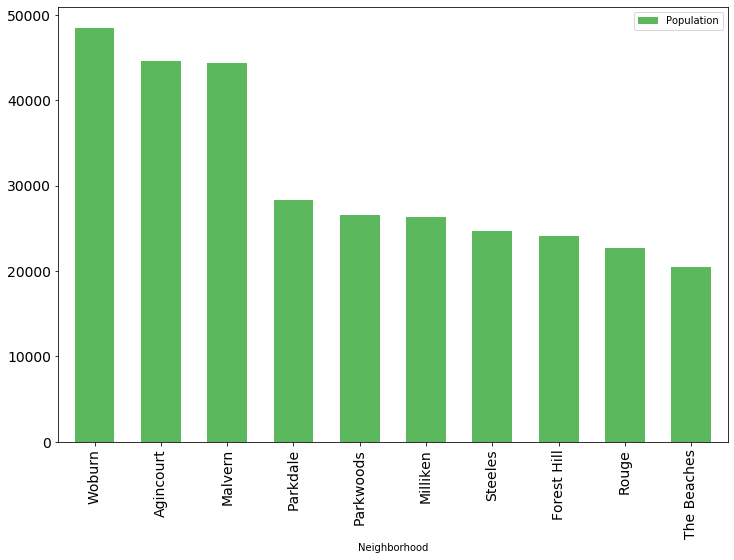

In [224]:
population_chart = df[['Neighborhood', 'Population']].copy()
population_chart.sort_values(by=['Population'],ascending=False,inplace=True)
top_chart = population_chart.head(10)
top_chart.set_index('Neighborhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)


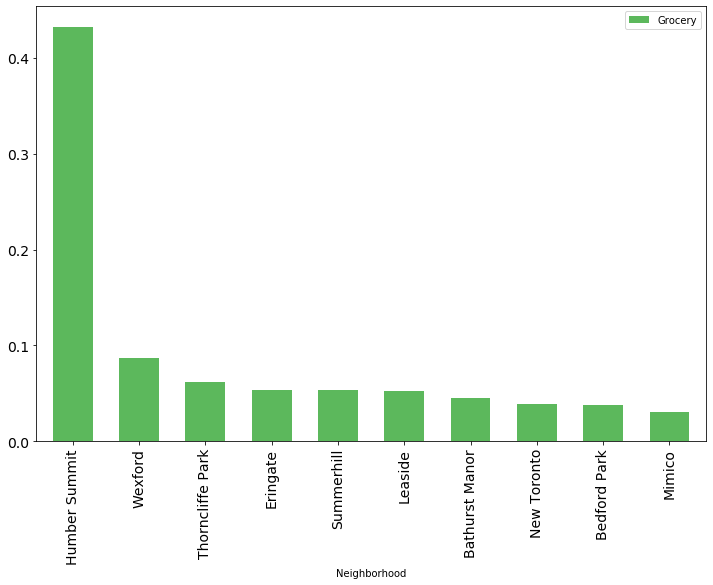

In [225]:
grocery_chart = df_copy[['Neighborhood', 'Grocery']].copy()
top_chart = grocery_chart.sort_values(by=['Grocery'],ascending=False).head(10)
top_chart.set_index('Neighborhood', inplace=True)

# plot data
colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)